<a href="https://colab.research.google.com/github/Khaled-Darwish/streamlit/blob/main/FINAL_AI_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load dataset
file_path = '/content/COX2_Human_Combined_PubChemFingerPrint_IC50_NoMissing.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [ ]:
# Display dataset structure
print("Dataset Shape:", data.shape)

Dataset Shape: (8414, 882)


In [ ]:
print("Column Names:", data.columns[:10])  # Display first 10 column names for brevity

Column Names: Index(['IC50 (nM)', 'PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3',
       'PubchemFP4', 'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8'],
      dtype='object')


In [ ]:
print(data.head())  # Show the first 5 rows

   IC50 (nM)  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0   0.005998           1           1           1           0           0   
1   0.006000           1           1           1           0           0   
2   0.020000           1           1           1           0           0   
3   0.020000           1           1           1           0           0   
4   0.020000           1           1           1           0           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP871  \
0           0           0           0           0  ...             0   
1           0           0           0           0  ...             0   
2           0           0           0           0  ...             0   
3           0           0           0           0  ...             0   
4           0           0           0           0  ...             0   

   PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0             0             0      

In [ ]:
print(data.tail())  # Show the last 5 rows

      IC50 (nM)  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
8409      920.0           1           1           1           0           0   
8410     6860.0           1           1           1           0           0   
8411    61440.0           1           1           0           0           0   
8412   124640.0           1           1           1           0           0   
8413      210.0           1           1           0           0           0   

      PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP871  \
8409           0           0           0           0  ...             0   
8410           0           0           0           0  ...             0   
8411           0           0           0           0  ...             0   
8412           0           0           0           0  ...             0   
8413           0           0           0           0  ...             0   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876

In [ ]:
print(data.info())  # Show data types and non-null counts /General information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8414 entries, 0 to 8413
Columns: 882 entries, IC50 (nM) to PubchemFP880
dtypes: float64(1), int64(881)
memory usage: 56.6 MB
None


In [ ]:
print(data.describe())  # Show summary statistics for numerical columns

          IC50 (nM)   PubchemFP0   PubchemFP1   PubchemFP2   PubchemFP3  \
count  8.414000e+03  8414.000000  8414.000000  8414.000000  8414.000000   
mean   7.280220e+05     0.959829     0.947825     0.552294     0.018778   
std    1.957883e+07     0.196372     0.222393     0.497287     0.135749   
min    5.998000e-03     0.000000     0.000000     0.000000     0.000000   
25%    1.000000e+02     1.000000     1.000000     0.000000     0.000000   
50%    8.200000e+02     1.000000     1.000000     1.000000     0.000000   
75%    6.100000e+03     1.000000     1.000000     1.000000     0.000000   
max    8.912510e+08     1.000000     1.000000     1.000000     1.000000   

       PubchemFP4  PubchemFP5   PubchemFP6  PubchemFP7  PubchemFP8  ...  \
count      8414.0      8414.0  8414.000000      8414.0      8414.0  ...   
mean          0.0         0.0     0.000238         0.0         0.0  ...   
std           0.0         0.0     0.015417         0.0         0.0  ...   
min           0.0       

In [ ]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 IC50 (nM)       0
PubchemFP0      0
PubchemFP1      0
PubchemFP2      0
PubchemFP3      0
               ..
PubchemFP876    0
PubchemFP877    0
PubchemFP878    0
PubchemFP879    0
PubchemFP880    0
Length: 882, dtype: int64


In [ ]:
# Preprocess Data
# Categorize compounds based on IC50 values
data['Activity'] = np.where(data['IC50 (nM)'] <= 1000, 1, 0)  # 1 for Active, 0 for Inactive
data.drop(columns=['IC50 (nM)'], inplace=True)  # Remove original IC50 column

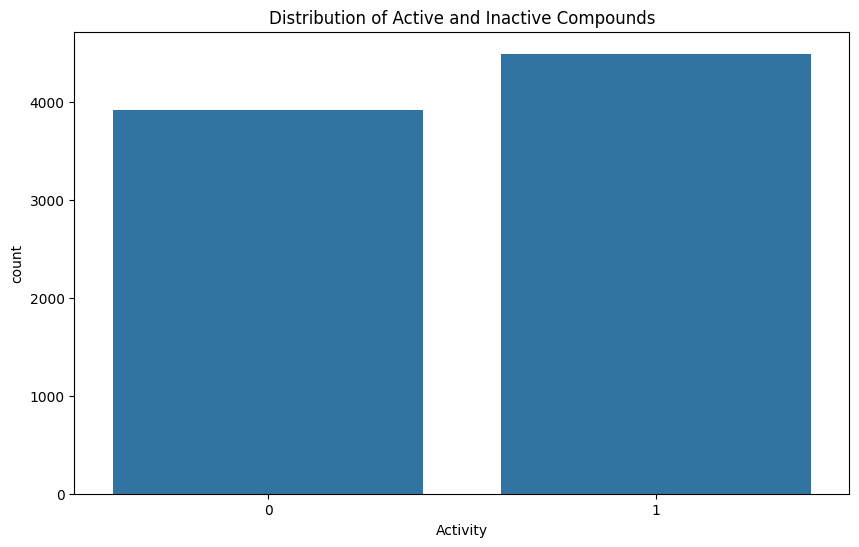

In [ ]:
# Visualize data distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=data)
plt.title('Distribution of Active and Inactive Compounds')
plt.show()

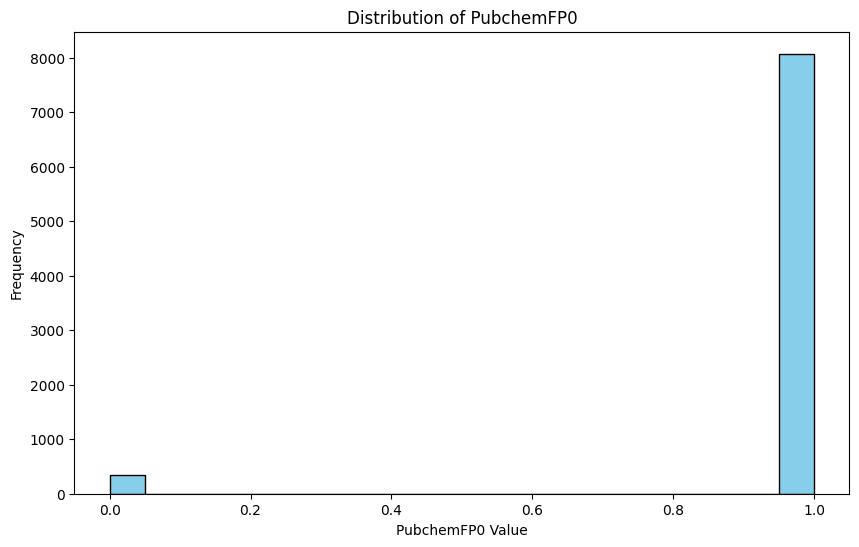

In [ ]:
# Visualize data distribution using a histogram for a specific feature
plt.figure(figsize=(10, 6))
plt.hist(data['PubchemFP0'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('PubchemFP0 Value')
plt.ylabel('Frequency')
plt.title('Distribution of PubchemFP0')
plt.show()

In [ ]:
# Splitting features and target variable
X = data.drop(columns=['Activity'])
y = data['Activity']

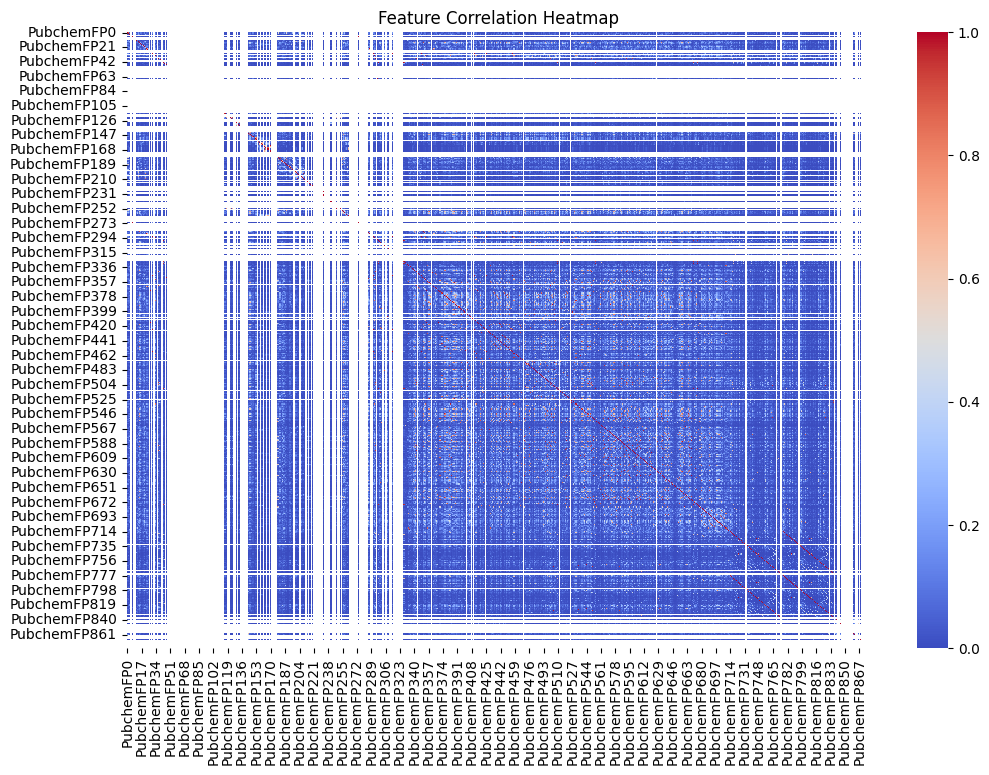

In [ ]:
# Check feature correlations
correlation_matrix = X.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
PubchemFP0,1.000000,0.871953,0.227221,0.028301,NaN,NaN,0.003154,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP1,0.871953,1.000000,0.260589,0.032457,NaN,NaN,0.003618,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP2,0.227221,0.260589,1.000000,0.124553,NaN,NaN,0.013883,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP3,0.028301,0.032457,0.124553,1.000000,NaN,NaN,0.002133,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PubchemFP876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

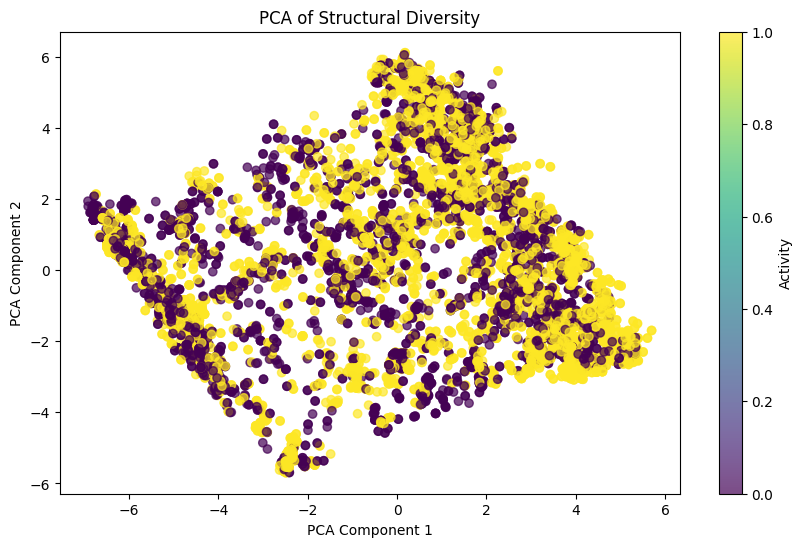

In [ ]:
# Visualize PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Activity')
plt.title('PCA of Structural Diversity')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy (RFC):", accuracy)

Model Accuracy (RFC): 0.9310754604872252


In [ ]:
# Classification report
print("\nClassification Report (RFC):\n", classification_report(y_test, y_pred))


Classification Report (RFC):
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       758
           1       0.93      0.94      0.94       925

    accuracy                           0.93      1683
   macro avg       0.93      0.93      0.93      1683
weighted avg       0.93      0.93      0.93      1683



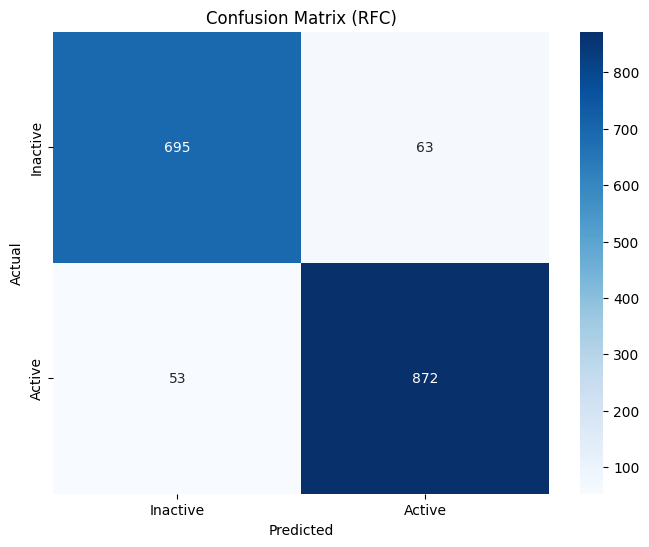

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix (RFC)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

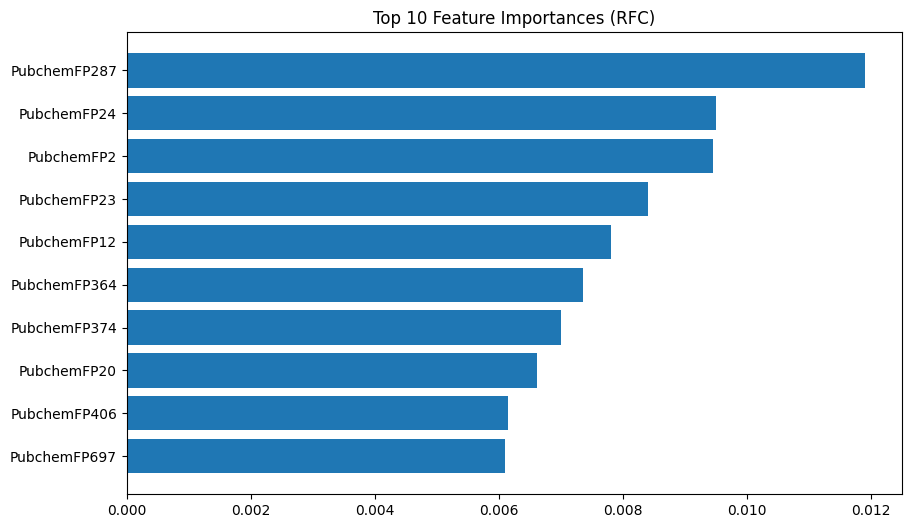

In [ ]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 important features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top 10 Feature Importances (RFC)')
plt.show()

In [ ]:
import joblib

In [ ]:
# Save the trained model
joblib.dump(model, 'RFCmodel.pkl')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Import Linear Regression for comparison
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predictions and Evaluation
y_pred = lr_model.predict(X_test)

In [ ]:
# Convert predictions to binary for classification interpretation
y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print("Model Accuracy (Logistic Regression):", accuracy)

Model Accuracy (Logistic Regression): 0.7699009900990099


In [ ]:
# Classification report
print("\nClassification Report (LRM):\n", classification_report(y_test, y_pred_class))


Classification Report (LRM):
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1373
           1       0.76      0.73      0.74      1152

    accuracy                           0.77      2525
   macro avg       0.77      0.77      0.77      2525
weighted avg       0.77      0.77      0.77      2525



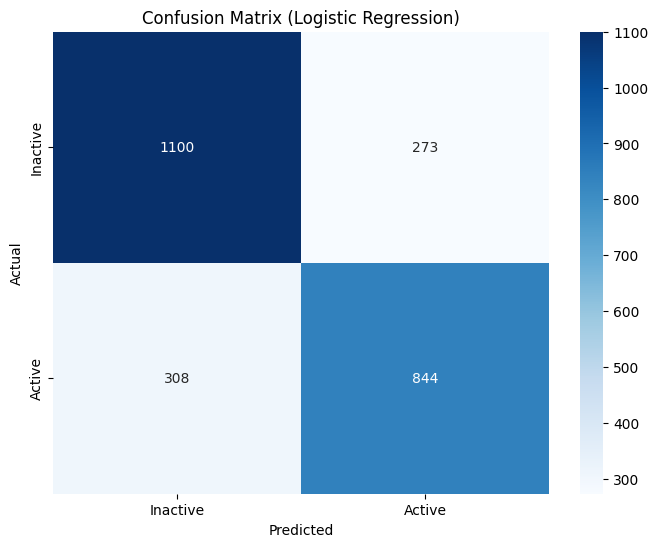

In [ ]:
# Confusion Matrix for Classification
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

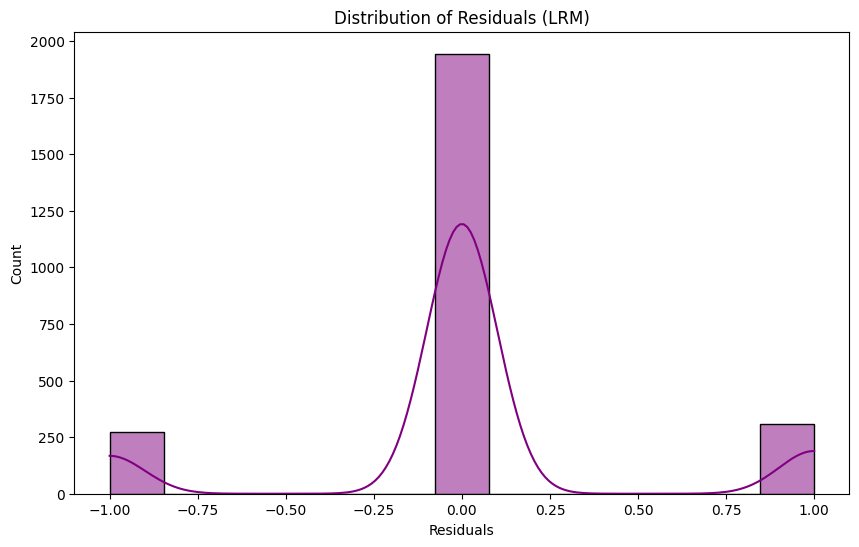

In [ ]:
# Visualize Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals (LRM)')
plt.xlabel('Residuals')
plt.show()

In [ ]:
# Save the trained model
joblib.dump(model, 'LRmodel.pkl')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Import SVM from scikit-learn
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
# Predictions
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluation Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Model Accuracy (SVM):", accuracy_svm)

Model Accuracy (SVM): 0.8


In [ ]:
# Classification Report
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))


Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.79      0.86      0.82      1373
           1       0.81      0.73      0.77      1152

    accuracy                           0.80      2525
   macro avg       0.80      0.79      0.80      2525
weighted avg       0.80      0.80      0.80      2525



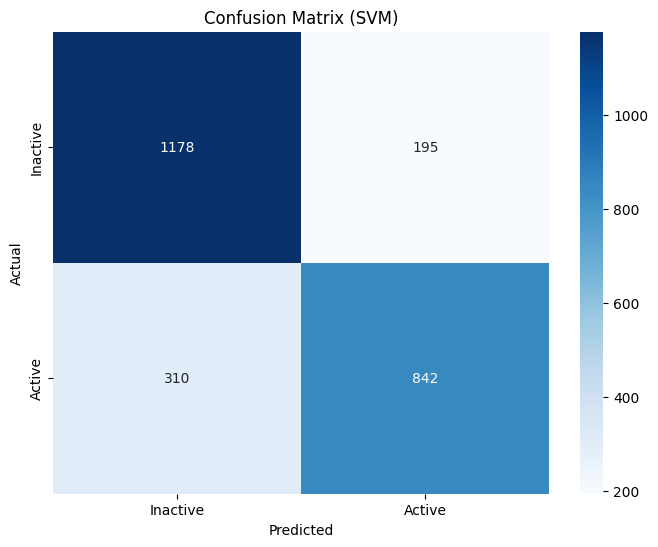

In [ ]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


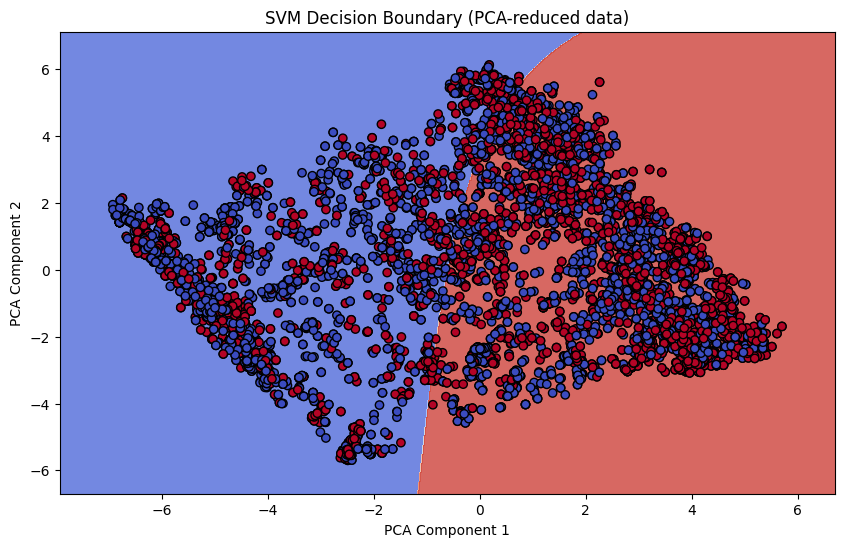

In [ ]:
# Decision Boundary Visualization (if dataset has 2D PCA)
if X_pca.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    h = 0.02  # Mesh step size
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Transform the meshgrid data using the same PCA transformation used for training data
    meshgrid_data = np.c_[xx.ravel(), yy.ravel()]
    # Assuming you have a PCA object named 'pca' used for dimensionality reduction
    # If not, replace 'pca' with the actual variable name
    transformed_meshgrid_data = pca.inverse_transform(meshgrid_data)

    Z = svm_model.predict(transformed_meshgrid_data) # Predict on the transformed data
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title('SVM Decision Boundary (PCA-reduced data)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

In [ ]:
# Save the trained model
joblib.dump(model, 'SVMmodel.pkl')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Import XGBoost classifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:24:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluation Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Model Accuracy (XGBoost):", accuracy_xgb)

Model Accuracy (XGBoost): 0.8617821782178218


In [ ]:
# Classification Report
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))


Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1373
           1       0.85      0.85      0.85      1152

    accuracy                           0.86      2525
   macro avg       0.86      0.86      0.86      2525
weighted avg       0.86      0.86      0.86      2525



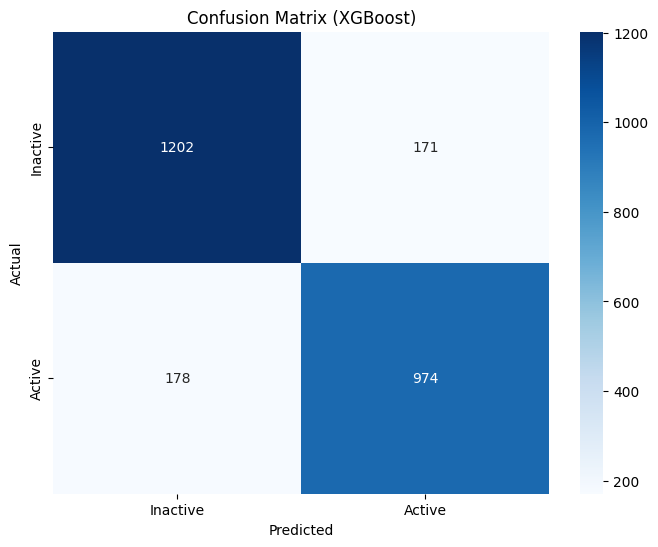

In [ ]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

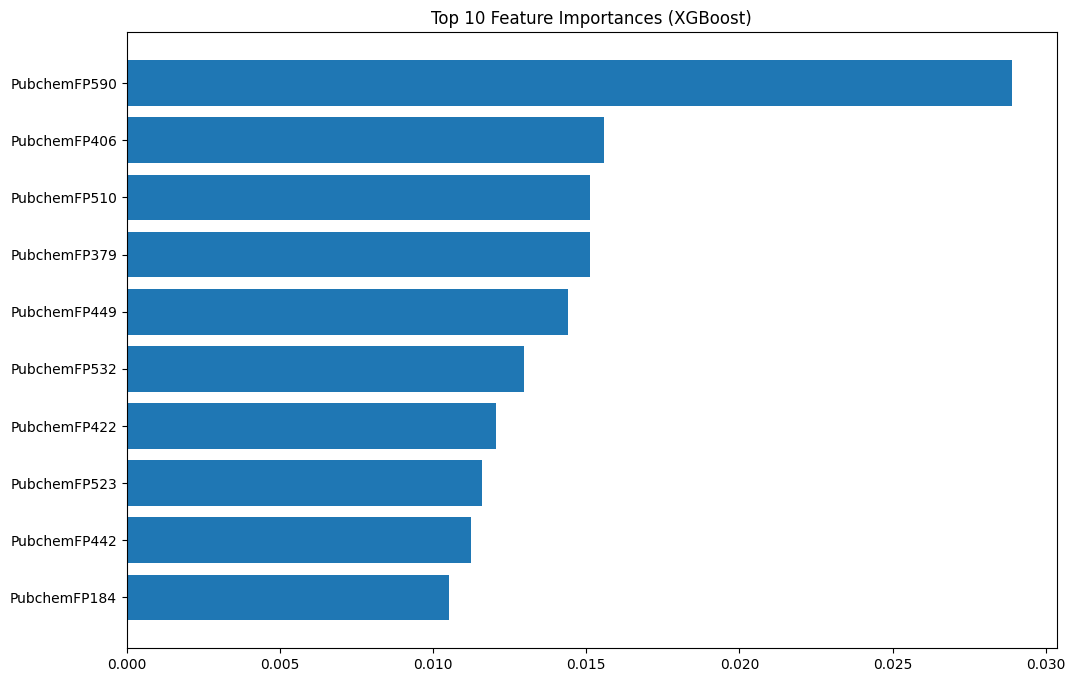

In [ ]:
# Feature Importance
plt.figure(figsize=(12, 8))
feature_importances = xgb_model.feature_importances_
indices = np.argsort(feature_importances)[-10:]  # Top 10 features
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()

In [ ]:
# Save the trained model
joblib.dump(model, 'XGBoostmodel.pkl')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Train K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with the number of neighbors
knn_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(knn_model, 'knn_model.pkl')
print("K-Nearest Neighbors model saved successfully!")

# Predict using the model
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Model Accuracy (K-NN):", accuracy_knn)

# Load the saved model, using the correct filename: 'knn_model.pkl'
loaded_model_knn = joblib.load('knn_model.pkl')

# Make predictions with the loaded model
y_pred_loaded_knn = loaded_model_knn.predict(X_test)

# Evaluate the loaded model
accuracy_loaded_knn = accuracy_score(y_test, y_pred_loaded_knn)
print("Loaded K-Nearest Neighbors Model Accuracy:", accuracy_loaded_knn)

K-Nearest Neighbors model saved successfully!
Model Accuracy (K-NN): 0.8308910891089109
Loaded K-Nearest Neighbors Model Accuracy: 0.8308910891089109


In [ ]:
# Classification Report
print("\nClassification Report (K-Nearest Neighbors):\n", classification_report(y_test, y_pred_knn))


Classification Report (K-Nearest Neighbors):
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1373
           1       0.81      0.82      0.82      1152

    accuracy                           0.83      2525
   macro avg       0.83      0.83      0.83      2525
weighted avg       0.83      0.83      0.83      2525



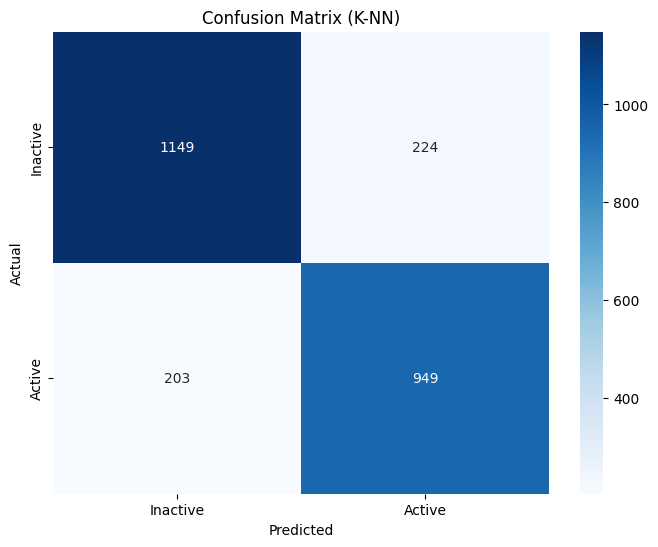

In [ ]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix (K-NN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
!pip install rdkit-pypi scikit-learn pandas joblib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Scalarenes_PubchemFingerPrints_SMILES.csv to Scalarenes_PubchemFingerPrints_SMILES.csv
Saving RFCmodel.pkl to RFCmodel (1).pkl


In [ ]:
# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import joblib # Changed from pickle to joblib
from sklearn.neighbors import KNeighborsRegressor

# Step 3: Load the fingerprint data
# Replace 'fingerprints.csv' with your actual file name
fingerprint_df = pd.read_csv("Scalarenes_PubchemFingerPrints_SMILES.csv")

# Optional: Preview the data
print("Fingerprint data:")
display(fingerprint_df.head())

# Step 4: Load the pretrained KNN model
# Replace 'knn_model.pkl' with your actual model filename
# with open("knn_model.pkl", "rb") as model_file: # Commented out the incorrect way to load the model
#    knn_model = pickle.load(model_file)
knn_model = joblib.load("RFCmodel.pkl")  # Load the model using joblib

# Step 5: Predict IC50 values
# Ensure the input to the model matches training format
X = fingerprint_df.drop(columns=['Smiles']).values # Remove 'SMILES' column

# Get feature names from original data (assuming 'data' is your original DataFrame)
feature_names = data.drop(columns=['Activity']).columns

# Create DataFrame with feature names
X_with_feature_names = pd.DataFrame(X, columns=feature_names)

predicted_ic50 = knn_model.predict_proba(X_with_feature_names)

# Step 6: Save predictions
results_df = pd.DataFrame({
    "Compound_ID": fingerprint_df.index,
    "Predicted_Activity": predicted_ic50
})

# Display result
print("Predictions:")
display(results_df)

# Step 7: Download results
results_df.to_csv("predicted_Activity.csv", index=False)
files.download("predicted_Activity.csv")

Fingerprint data:


,SMILES,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,O=P(O)(O)C(F)(F)c1ccc2ccccc2c1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](C)C(=O)N[C@...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,COc1ccc(-c2ccc(Cn3c4c(c5ccccc53)C(=O)CCNC4=O)c...,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cc1cc(CN(Cc2ccc(-c3csnn3)cc2)S(=O)(=O)c2ccccc2...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=C(O)COc1ccc(CN(Cc2ccc(-c3csnn3)cc2)S(=O)(=O)...,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


NameError: name 'data' is not defined

# **DO NOT RUN THIS for CoLab Prediction, Run this ONLY to dump MODEL to be DEPLOYED on Streamlit Wb app **

In [ ]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

In [ ]:
# Install RDKit (for working with molecular fingerprints)
!pip install -q rdkit-pypi

# Import required libraries
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import joblib  # for loading the model

# === STEP 1: Upload your model & csv.file of test is stored there ===
from google.colab import files
uploaded = files.upload()

# === STEP 2: Load the pretrained KNN model ===
# Adjust this path to where your .pkl file is located
knn_model = joblib.load("knn_model.pkl")  # Load the model using joblib

# === STEP 3: Load the fingerprint data ===
# Replace 'fingerprints.csv' with your actual file name
fingerprint_df = pd.read_csv("PTP1B_CHEMBL_PubChemFingerPrint_SMILES_BEST.csv")

# === STEP 4: Extract features (PubChem fingerprints)
# Assumes the SMILES are in a column named 'SMILES'
# and the fingerprint columns are all other columns
# If 'SMILES' is present, drop it for prediction
# Changed 'df' to 'fingerprint_df'
if 'SMILES' in fingerprint_df.columns:
    X = fingerprint_df.drop(columns=['SMILES'])
else:
    # Changed 'df' to 'fingerprint_df'
    X = fingerprint_df

# Confirm shape and type
print("Feature matrix shape:", X.shape)

# === STEP 5: Predict probabilities using the KNN model
# Check if model supports predict_proba
# Changed 'model' to 'knn_model'
if hasattr(knn_model, 'predict_proba'):
    probabilities = knn_model.predict_proba(X)
    # If binary classification, you might want only class 1
    # Add probabilities to the dataframe
    # Changed 'df' to 'fingerprint_df'
    fingerprint_df['Probability'] = probabilities[:, 1]  # Use :, 0 for class 0
else:
    raise Exception("Model does not support probability prediction.")

# === STEP 6: View and save the results
# Changed 'df' to 'fingerprint_df'
fingerprint_df[['SMILES', 'Probability']].head()

# Save to new CSV
# Changed 'df' to 'fingerprint_df'
fingerprint_df.to_csv('predicted_probabilities.csv', index=False)

# Download the result
files.download('predicted_probabilities.csv')

Saving knn_model.pkl to knn_model (1).pkl
Saving PTP1B_CHEMBL_PubChemFingerPrint_SMILES_BEST.csv to PTP1B_CHEMBL_PubChemFingerPrint_SMILES_BEST (1).csv
Feature matrix shape: (3719, 881)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **To Predict PROBABILITIES Only then the next Both**
(O = inactive; fraction till unity i.e. 1 = increasing activity till full active)

In [ ]:
# Install RDKit (for working with molecular fingerprints)
!pip install -q rdkit-pypi

# Import required libraries
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import joblib  # for loading the model

# === STEP 1: Upload your model & csv.file of test is stored there ===
from google.colab import files
uploaded = files.upload()

# === STEP 2: Load the pretrained KNN model ===
# Adjust this path to where your .pkl file is located
knn_model = joblib.load("knn_model.pkl")  # Load the model using joblib

# === STEP 3: Load the fingerprint data ===
# Replace 'fingerprints.csv' with your actual file name
fingerprint_df = pd.read_csv("PTP1B_CHEMBL_PubChemFingerPrint_SMILES_BEST.csv")

# === STEP 4: Extract features (PubChem fingerprints)
# Assumes the SMILES are in a column named 'SMILES'
# and the fingerprint columns are all other columns
# If 'SMILES' is present, drop it for prediction
# Changed 'df' to 'fingerprint_df'
if 'SMILES' in fingerprint_df.columns:
    X = fingerprint_df.drop(columns=['SMILES'])
else:
    # Changed 'df' to 'fingerprint_df'
    X = fingerprint_df

# Confirm shape and type
print("Feature matrix shape:", X.shape)

# === STEP 5: Predict probabilities using the KNN model
# Check if model supports predict_proba
# Changed 'model' to 'knn_model'
if hasattr(knn_model, 'predict_proba'):
    probabilities = knn_model.predict_proba(X)
    # If binary classification, you might want only class 1
    # Add probabilities to the dataframe
    # Changed 'df' to 'fingerprint_df'
    fingerprint_df['Probability'] = probabilities[:, 1]  # Use :, 0 for class 0
else:
    raise Exception("Model does not support probability prediction.")

# === STEP 6: View and save the results
# Changed 'df' to 'fingerprint_df'
fingerprint_df[['SMILES', 'Probability']].head()

# Save to new CSV
# Changed 'df' to 'fingerprint_df'
fingerprint_df.to_csv('predicted_probabilities.csv', index=False)

# Download the result
files.download('predicted_probabilities.csv')

In [ ]:
# Step 1: Install any necessary packages (if needed)
!pip install pandas scikit-learn rdkit-pypi

# Step 2: Import necessary libraries
import pandas as pd
import pickle
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files

# Step 3: Upload the files
print("Upload your model (.pkl) and your fingerprint CSV file")
uploaded = files.upload()

# Step 4: Identify the files
model_filename = [f for f in uploaded if f.endswith('.pkl')][0]
csv_filename = [f for f in uploaded if f.endswith('.csv')][0]

# Step 5: Load the model
with open(model_filename, 'rb') as f:
    knn_model = pickle.load(f)

# Step 6: Load the CSV
df = pd.read_csv(csv_filename)

# Show first few rows to confirm structure
print("First few rows of the CSV:")
print(df.head())

# Step 7: Extract features
# Assuming 'SMILES' is a column and the next 881 columns are the fingerprint bits
X = df.iloc[:, 1:882]  # adjust indices if your file includes different columns

# Step 8: Predict activity and probabilities (model.predict(X) if RFC; knn_model.predict(X) if KNN)
predictions = model.predict(X)
probabilities = model.predict_proba(X)

# Step 9: Add predictions to the DataFrame
df['Predicted_Activity'] = predictions
df['Probability_Class_0'] = probabilities[:, 0]
df['Probability_Class_1'] = probabilities[:, 1]

# Step 10: Save the new file
output_filename = 'predictions_output.csv'
df.to_csv(output_filename, index=False)

# Step 11: Download the result
files.download(output_filename)

Upload your model (.pkl) and your fingerprint CSV file


Saving Scalarenes_PubchemFingerPrints_SMILES.csv to Scalarenes_PubchemFingerPrints_SMILES.csv
Saving RFCmodel.pkl to RFCmodel (1).pkl
First few rows of the CSV:
                                              Smiles  PubchemFP0  PubchemFP1  \
0  CC(=O)O[C@H]4C[C@H]3[C@]2(C)CC[C@H]1C(C)(C)CCC...           1           1   
1  CC(=O)O[C@H]/4C[C@H]3[C@]2(C)CC[C@H]1C(C)(C)CC...           1           1   
2  CC1(C)CCC[C@@]4(C)[C@H]1CC[C@@]5(C)[C@@H]3CC/C...           1           1   
3  CC(=O)O[C@@H]4C[C@@H]2[C@@]1(C)CCCC(C)(C)[C@@H...           1           1   
4  CC(=O)O[C@@H]4C[C@@H]2[C@@]1(C)CCCC(C)(C)[C@@H...           1           1   

   PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  \
0           1           1           0           0           0           0   
1           1           1           0           0           0           0   
2           1           1           0           0           0           0   
3           1           1           0           0 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>